In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [47]:
df = pd.read_csv("student_study_habits.csv")
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


Basic Data Analyses

In [48]:
df.shape

(500, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [50]:
df.isnull().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [51]:
df.duplicated().sum()

np.int64(0)

Eploratory Data Analyses - EDA

Skewness of numerical columns:
 study_hours_per_week     0.173201
sleep_hours_per_day      0.057551
attendance_percentage   -0.395270
assignments_completed    0.023763
final_grade              0.091283
dtype: float64


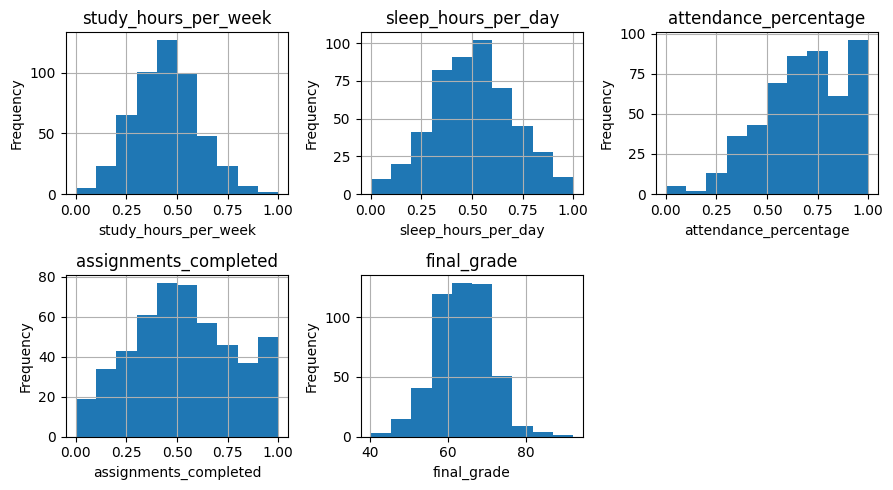

In [52]:
numeric_cols = ['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed', 'final_grade']
skewness = df[numeric_cols].skew()
print("Skewness of numerical columns:\n", skewness)

plt.figure(figsize=(9,5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    df[col].hist()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Number of outliers:
study_hours_per_week: 3
sleep_hours_per_day: 3
attendance_percentage: 2
assignments_completed: 0
final_grade: 5


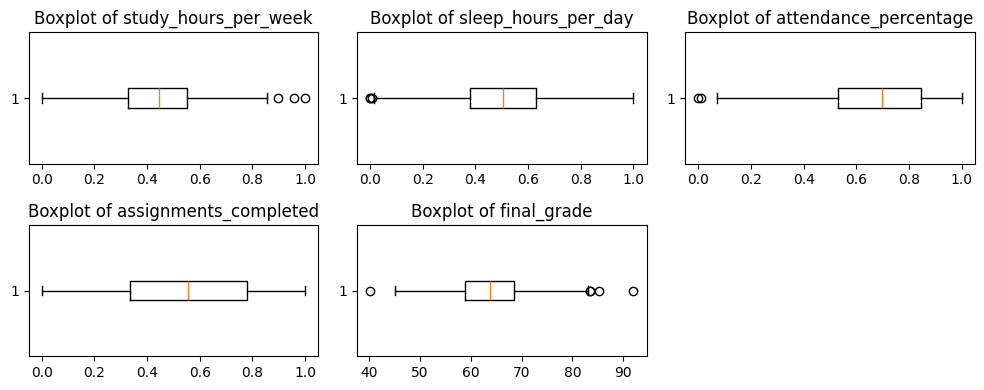

In [53]:
numeric_cols = ['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed', 'final_grade']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_count = {}
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = outliers.shape[0]
print("Number of outliers:")
for col, count in outlier_count.items():
    print(f"{col}: {count}")

plt.figure(figsize=(10,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [54]:
outlier_count_after = {}
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count_after[col] = outliers_after.shape[0]
print("Number of outliers after capping:")
for col, count in outlier_count_after.items():
    print(f"{col}: {count}")

Number of outliers after capping:
study_hours_per_week: 0
sleep_hours_per_day: 0
attendance_percentage: 0
assignments_completed: 0
final_grade: 0


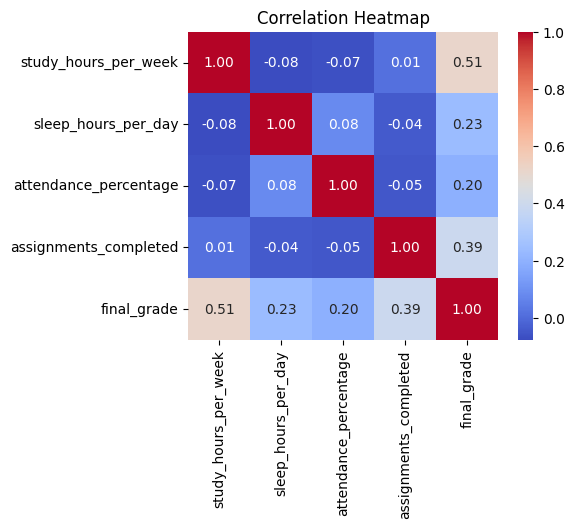

In [55]:
numeric_cols = ['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed', 'final_grade']
corr= df[numeric_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Create target variable (pass_fail)

In [56]:
df['pass_fail'] = (df['final_grade'] >= 50).astype(int)
print(df['pass_fail'].value_counts())

pass_fail
1    484
0     16
Name: count, dtype: int64


Select features for modeling

In [57]:
features = ['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed', 'parental_education_High School','parental_education_Master\'s', 'parental_education_PhD']

X = df[features]
y = df['pass_fail']

Train-test split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Handle Imbalance with SMOTE

In [60]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

Train Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
rf_probs = rf.predict_proba(X_test)[:,1]
threshold = 0.4
y_pred_rf = (rf_probs >= threshold).astype(int)

Random Forest Results
Random Forest Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      1.00      0.98        97

    accuracy                           0.97       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.94      0.97      0.96       100



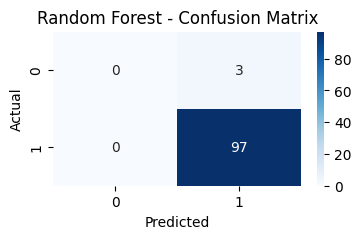

In [63]:
print("Random Forest Results")
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cr = classification_report(y_test, y_pred_rf, zero_division=0)
print("Random Forest Accuracy:", rf_acc)
print("Classification Report:\n", rf_cr)

plt.figure(figsize=(4,2))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f"Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Train Naïve Bayes

In [64]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [65]:
y_pred_nb = nb.predict(X_test)

Naïve Bayes Results
Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.05      1.00      0.09         3
           1       1.00      0.40      0.57        97

    accuracy                           0.42       100
   macro avg       0.52      0.70      0.33       100
weighted avg       0.97      0.42      0.56       100



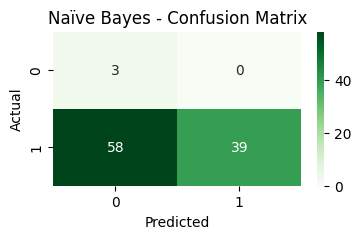

In [66]:
print("Naïve Bayes Results")
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_cr = classification_report(y_test, y_pred_nb)
print("Accuracy:", nb_acc)
print("Classification Report:\n", nb_cr)

plt.figure(figsize=(4,2))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()